In [59]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [69]:
ihart_deletions_dir = '../deletions_ihart'
ihart_ped_file = '../data/v34.vcf.ped'

ssc_deletions_dir = '../deletions_ssc'
ssc_ped_file = '../data/ssc.ped'


In [70]:
with open('%s/chr.PAR1.deletions.json' % ihart_deletions_dir, 'r') as f:
    ihart_deletions = json.load(f)
    
with open('%s/chr.PAR1.deletions.json' % ssc_deletions_dir, 'r') as f:
    ssc_deletions = json.load(f)

In [62]:
sample_to_sex = dict()
with open(ihart_ped_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        sample_to_sex[pieces[1]] = pieces[4]
with open(ssc_ped_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        sample_to_sex[pieces[1]] = pieces[4]

In [72]:
ihart_children = set()
ssc_children = set()
with open('%s/individuals.txt' % ihart_deletions_dir, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        if pieces[1] == 'child':
            ihart_children.add(pieces[0])
            
with open('%s/individuals.txt' % ssc_deletions_dir, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        if pieces[1] == 'child':
            ssc_children.add(pieces[0])    
            
num_ihart_males, num_ihart_females = len([x for x in ihart_children if sample_to_sex[x]=='1']), len([x for x in ihart_children if sample_to_sex[x]=='2'])
num_ssc_males, num_ssc_females = len([x for x in ssc_children if sample_to_sex[x]=='1']), len([x for x in ssc_children if sample_to_sex[x]=='2'])

print('iHART', num_ihart_males, num_ihart_females)
print('SSC', num_ssc_males, num_ssc_females)

iHART 1395 531
SSC 693 343


In [73]:
# positions, pat/mat, inherited/denovo, M/F
deletions_ihart = np.zeros((2699520, 2, 2, 2), dtype=int)
deletions_ssc = np.zeros((2699520, 2, 2, 2), dtype=int)

for d in ihart_deletions:
    for trans in d['trans']:
        deletions_ihart[d['start_pos']:d['end_pos'], 
                       int(d['is_mat']), 
                       int(d['is_denovo']),
                       int(sample_to_sex[trans] == '2')] += 1
        ihart_children.update(d['trans'])
        ihart_children.update(d['notrans'])

for d in ssc_deletions:
    for trans in d['trans']:
        deletions_ssc[d['start_pos']:d['end_pos'], 
                       int(d['is_mat']), 
                       int(d['is_denovo']),
                       int(sample_to_sex[trans] == '2')] += 1
        ssc_children.update(d['trans'])
        ssc_children.update(d['notrans'])





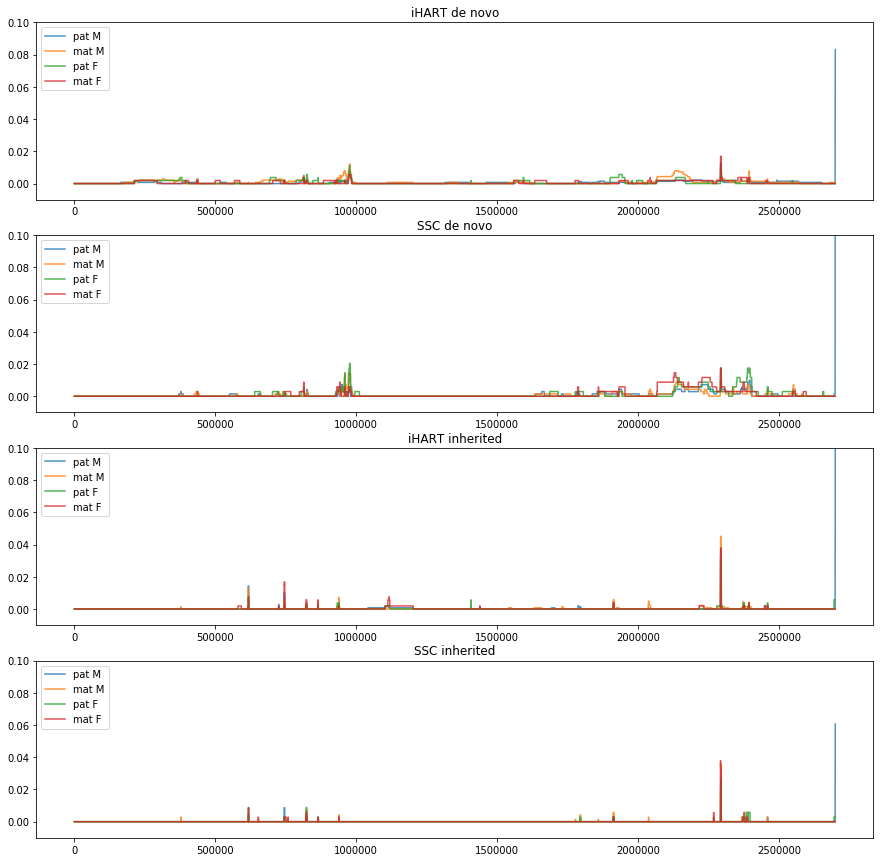

In [74]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(4, 1, 1)
plt.plot(deletions_ihart[:, 0, 1, 0]/num_ihart_males, label='pat M', alpha=0.8)
plt.plot(deletions_ihart[:, 1, 1, 0]/num_ihart_males, label='mat M', alpha=0.8)
plt.plot(deletions_ihart[:, 0, 1, 1]/num_ihart_females, label='pat F', alpha=0.8)
plt.plot(deletions_ihart[:, 1, 1, 1]/num_ihart_females, label='mat F', alpha=0.8)
plt.title('iHART de novo')
plt.legend()

plt.subplot(4, 1, 2, sharey=ax)
plt.plot(deletions_ssc[:, 0, 1, 0]/num_ssc_males, label='pat M', alpha=0.8)
plt.plot(deletions_ssc[:, 1, 1, 0]/num_ssc_males, label='mat M', alpha=0.8)
plt.plot(deletions_ssc[:, 0, 1, 1]/num_ssc_females, label='pat F', alpha=0.8)
plt.plot(deletions_ssc[:, 1, 1, 1]/num_ssc_females, label='mat F', alpha=0.8)
plt.title('SSC de novo')
plt.legend()

plt.subplot(4, 1, 3, sharey=ax)
plt.plot(deletions_ihart[:, 0, 0, 0]/num_ihart_males, label='pat M', alpha=0.8)
plt.plot(deletions_ihart[:, 1, 0, 0]/num_ihart_males, label='mat M', alpha=0.8)
plt.plot(deletions_ihart[:, 0, 0, 1]/num_ihart_females, label='pat F', alpha=0.8)
plt.plot(deletions_ihart[:, 1, 0, 1]/num_ihart_females, label='mat F', alpha=0.8)
plt.title('iHART inherited')
plt.legend()

plt.subplot(4, 1, 4, sharey=ax)
plt.plot(deletions_ssc[:, 0, 0, 0]/num_ssc_males, label='pat M', alpha=0.8)
plt.plot(deletions_ssc[:, 1, 0, 0]/num_ssc_males, label='mat M', alpha=0.8)
plt.plot(deletions_ssc[:, 0, 0, 1]/num_ssc_females, label='pat F', alpha=0.8)
plt.plot(deletions_ssc[:, 1, 0, 1]/num_ssc_females, label='mat F', alpha=0.8)
plt.title('SSC inherited')
plt.ylim([-0.01, 0.10])
plt.legend()

plt.show()

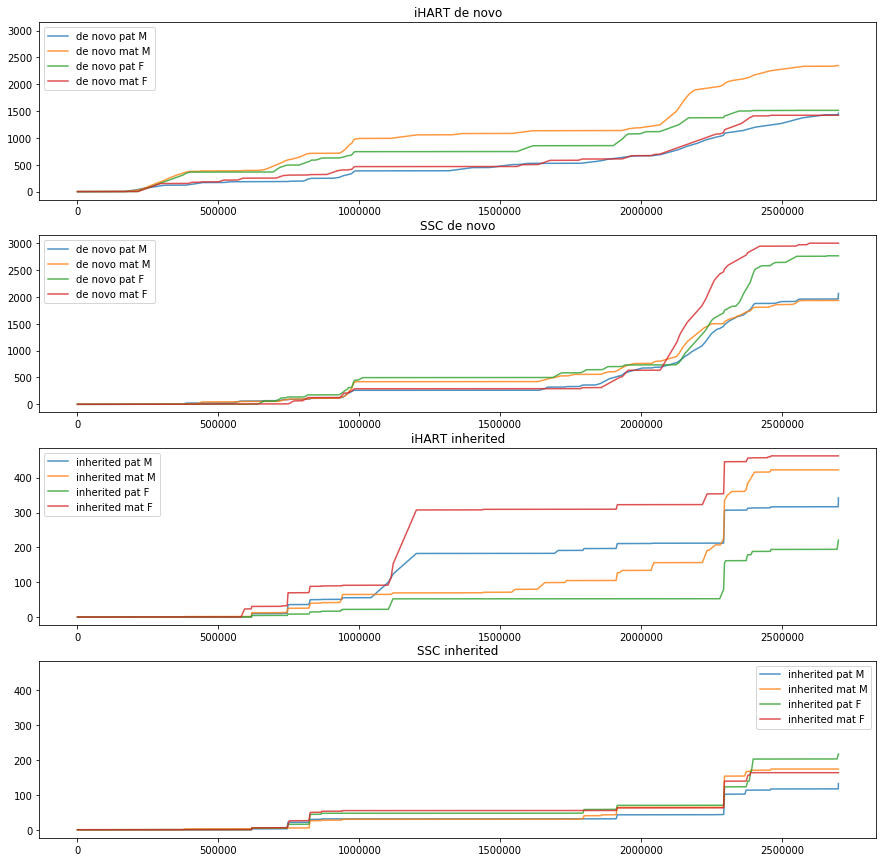

In [75]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(4, 1, 1)
plt.plot(np.cumsum(deletions_ihart[:, 0, 1, 0])/num_ihart_males, label='de novo pat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 1, 1, 0])/num_ihart_males, label='de novo mat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 0, 1, 1])/num_ihart_females, label='de novo pat F', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 1, 1, 1])/num_ihart_females, label='de novo mat F', alpha=0.8)
plt.legend()
plt.title('iHART de novo')

plt.subplot(4, 1, 2, sharey=ax)
plt.plot(np.cumsum(deletions_ssc[:, 0, 1, 0])/num_ssc_males, label='de novo pat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 1, 1, 0])/num_ssc_males, label='de novo mat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 0, 1, 1])/num_ssc_females, label='de novo pat F', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 1, 1, 1])/num_ssc_females, label='de novo mat F', alpha=0.8)
plt.legend()
plt.title('SSC de novo')

ax = plt.subplot(4, 1, 3)
plt.plot(np.cumsum(deletions_ihart[:, 0, 0, 0])/num_ihart_males, label='inherited pat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 1, 0, 0])/num_ihart_males, label='inherited mat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 0, 0, 1])/num_ihart_females, label='inherited pat F', alpha=0.8)
plt.plot(np.cumsum(deletions_ihart[:, 1, 0, 1])/num_ihart_females, label='inherited mat F', alpha=0.8)
plt.legend()
plt.title('iHART inherited')

plt.subplot(4, 1, 4, sharey=ax)
plt.plot(np.cumsum(deletions_ssc[:, 0, 0, 0])/num_ssc_males, label='inherited pat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 1, 0, 0])/num_ssc_males, label='inherited mat M', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 0, 0, 1])/num_ssc_females, label='inherited pat F', alpha=0.8)
plt.plot(np.cumsum(deletions_ssc[:, 1, 0, 1])/num_ssc_females, label='inherited mat F', alpha=0.8)
plt.legend()
plt.title('SSC inherited')

plt.show()